## Module 3: Exploratory data analysis  

### Lesson 2: Understanding Data Distributions
- In this lesson, we are going to discuss some of the common shapes of the data distributions that we see in real time applications.
- Data distribution refers to the way data points are spread or distributed across different values in a dataset. In other words, it describes the pattern or shape that the data takes on when plotted on a graph. Understanding the distribution of data is essential for gaining insights into the characteristics of the data, making informed decisions, and selecting appropriate statistical methods for analysis.
- One of the key aspects of a data distribution include *probability distribution*.

##### Let us understand few key words now.
- **Random experiment:** 
    - It is a process or procedure that generates outcomes in an unpredictable manner. 
    - It's a fundamental concept in probability theory and is used to study and model uncertain events. 
    - Random experiments are essential for understanding and quantifying uncertainty in various real-world situations.
- **Random variable:** 
    - It is the outcome of random experiment. 
    - That is, random variable is a variable whose value is determined by chance, but it can take one of the values out of several possible outcomes of a random experiment. 
    - For example, tossing a coin is a random experiment, and the random variable may have the value head or tail.

- **Probability distribution:** 
    - It is a mathematical function that defines the likelihood of different outcomes or events in a random experiment or process. 
    - In simpler terms, a probability distribution tells us how likely different outcomes are to occur. 
    - It assigns probabilities to different possible values or ranges of values that a random variable can take on. 
    - Two important types of probability distributions are:
        - **Discrete Probability Distribution:** This type of distribution deals with discrete random variables, which can only take specific, distinct values. Examples include the binomial distribution (for counting successes in a fixed number of trials) and the Poisson distribution (for counting rare events occurring in a fixed interval).
        - **Continuous Probability Distribution:** These distributions are associated with continuous random variables, which can take any value within a certain range. Examples include the normal distribution (often called the bell curve), which is commonly used to model various natural phenomena like heights and weights.
        

**In the couple of few lectures, we will see few important distributions and their features and use-cases in real time.**

### Part 3.2.2  : Some other common shapes of data - Part I 
#### Binomial distribution
- The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N.
- the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes(x) in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $q = 1 − p$). 
- A single success/failure experiment is also called a Bernoulli trial or Bernoulli experiment. That is, when n = 1, the binomial distribution is a Bernoulli distribution.
- The probability mass function (PMF) of a binomial distribution gives the probability of observing a specific number of successes in a fixed number of independent Bernoulli trials. 
- Mathematically, the pmf of binomial distribution is as below:

$$
\begin{align}
P(X=x) = \binom{n}{x}p^x q^{(n-x)}
\end{align}
$$


- The mean of Binomial distribution is $np$ and the variance is $npq$
- Cumulative distribution function (CDF) of a binomial distribution gives the probability of observing up to a certain number of successes in a fixed number of independent Bernoulli trials.
- That is,
    $$F(x) = P(X ≤ x) $$

- **NOTE**:
    1. P(a < X ≤ b) = F(b) - F(a)
    2. The probability that a random variable X is greater than a value a is equal to 1 - P(X ≤ a), which is 1 - F(a).

**Let us see some simple examples on binomial distribution**

###### Example:
Consider a random experiment of tossing a coin 6 times. Find the following:
1. What is the probability of getting exactly 0 heads ?
2. What is the proability of getting 2 or less number of heads?

***Solution***:

Here, $n= 6$, $p=q=\frac{1}{2}$ and $x=0$

1. We need to find $P(X=0)$ and  $P(X\le 2)$
   
2. We need to find $P(x<=2)= P(x=0) + P(x=1) + P(x=2)$

In [ ]:
from scipy.stats import binom
# binom.pmf has a syntax as: pmf(x,n,p)

In [ ]:
# P(X=0)
print("Probability of getting exactly 0 heads when a coin is tossed 6 times =", binom.pmf(0,6,0.5))

In [ ]:
p= binom.pmf(0,6,0.5) + binom.pmf(1,6,0.5) + binom.pmf(2,6,0.5)
print("Probability of getting at the most 2 heads =", round(p,2))

In [ ]:
#Alternatively, we can use Cumulative probability
print("Probability of getting at the most 2 heads =",round(binom.cdf(2,6,0.5),2))

###### Example:
Assume that there is a road junction and several vehicles passes by everyday. Some drivers will ask for the direction at that junction. The probability of a driver seeking for direction is 0.45.  On a given day, you observe 200 vehicles passing through the junction. Then, what is the probability that
- exactly 100 drivers will stop and ask for direction?
- atleast 50 drivers will ask for direction?
- at the most 20 drivers will ask for direction?

1. Exactly 100 drivers will stop and ask for direction:
n = 200, p =0.45, q = 0.55, and x=100
P(X=x) = ?

In [ ]:
#exactly 100 drivers will stop and ask for direction
# P(X=100)
round(binom.pmf(100,200,0.45),2)

In [ ]:
# atleast 50 stop and ask direction 
# P(X>=50) = 1 - p(X<=49)
1- binom.cdf(49,200,0.45)

***Inference:***
- We can see that probability of at least 50 drivers stop and ask the direction is very high, almost equal to 1.
- This is because, as per the information given, p=0.45 implies that out of 100 drivers, 45 will bound to ask for direction.
- So, when we check for 'at least 50', it is obvious that we get almost certain answer.

In [ ]:
#at the most 20 drivers stop and ask direction 
# p(X<=20)
binom.cdf(20,200,0.45)

***Inference:***
- We can see that probability of at most 20 drivers stop and ask the direction is very low, almost equal to 0.
- This is because, as per the information given, p=0.45 implies that out of 100 drivers, 45 will bound to ask for direction.
- So, when we check for 'at the most 5=20', it is obvious that we are checking for almost an impossible situation and hence the result is zero.

#### We will now visualize how the shape of binomial distribution would be.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define parameters of the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate a range of k (number of successes) values
k_values = np.arange(0, n+1)

# Calculate PMF and CDF values for each k value
pmf_values = binom.pmf(k_values, n, p)
cdf_values = binom.cdf(k_values, n, p)

# Plot PMF
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.stem(k_values, pmf_values, basefmt='b', linefmt='b', markerfmt='bo')
plt.title('Binomial Distribution PMF')
plt.xlabel('k (Number of Successes)')
plt.ylabel('PMF')

# Plot CDF
plt.subplot(1, 2, 2)
plt.step(k_values, cdf_values, color='orange', where='post')
plt.title('Binomial Distribution CDF')
plt.xlabel('k (Number of Successes)')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()


#### Let's apply the knowledge of binomial distribution on a dataset:
- There is a data containing information about a campagin conducted for credit-card holders. The attributes like Card_ID, Campaign_Response, Reg Date, Gender and Birth date are available.
- The campaign response tells us whether a person has responded positively to the campaign.
- Based on this dataset, find out:
    - the probability that upto 15 customers will respond to campaign out of 150 randomly selected customers.
    - the probability that between 15 and 20 customers will respond to campaign out of 150 randomly selected customers?

In [ ]:
import pandas as pd

In [ ]:
camp=pd.read_excel('ProbDist_Data.xlsx',sheet_name='binom')
camp.head()

In [ ]:
camp.shape

**Compute the probability of success (yes to the campaign response) and failure**


In [ ]:
camp['Campaign_Responce'].value_counts(normalize=True)

###### What is the probability that upto 15 customers will respond to campaign out of 150 randomly selected customers?

n=150, p= 0.165, P(X<=15)=?

In [ ]:
#prob of success is rounded off to 3 decimal points
print("The answer is: ", round(binom.cdf(15,150,0.165),2))

###### What is the probability that between 15 and 20 customers will respond to campaign out of 150 randomly selected customers?

In [ ]:
# P(15 <= X <=20) = P(0<= X <=20) - P(0<= X <=14)
print("The answer is: ",round(binom.cdf(20,150,0.165) - binom.cdf(14, 150, 0.165),2))

### Part 3.2.3  : Some other common shapes of data - Part II 

#### Poison Distribution
- It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.
- When the number of successes (p) are very small compared to the number of trials (n), then we go for Poisson distribution. 
- Examples:
    - A call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely. 
    - The number of decay events that occur from a radioactive source during a defined observation period.
    - The number of road accidents in a given day at a particular road junction. Imagine number of vehicles passing by the junction per day. It is quite a huge number (like 1000, 10000 etc). But, the number of accidents observed per day will be 1 or 2 or at the max 10. So, this number is very small compared to actual number of vehicles that have passed the junction. Thus, this is a poisson distribution. 
- If X follows poisson distribution with parameter $\lambda$ then probability mass function is given by

$$P(X=x)=\frac{e^{-\lambda}\lambda^{x}}{x!} \quad  \forall x=0,1,2,3,4,...$$
- Mean=variance=$\lambda$

##### Example:
- Find the Probability of exactly 4 accidents in a month, given that average is 5 accidents/ month.
- Solution: Here, $\lambda = 5$. We need to compute $P(X=4)$

In [ ]:
from scipy.stats import poisson

In [ ]:
#The syntax of poisson.pmf is pmf(x, lambda)
print("Probability of exactly 4 accidents in a month:",round(poisson.pmf(4,5),2))

- What is the probability of 3 or lesser accidents in a month?

In [ ]:
#P(x<=3)=?
# use cumulative probability
print("Probability of at the most 3 accidents in a month:", round(poisson.cdf(3,5),2))

- What is the probability that 5  or more accidents in a month?

In [ ]:
# Pr(X>=5) =?
print("Probability of at least 5 accidents in a month:",round(1- poisson.cdf(4,5),2))

#### We will now visualize how the shape of poisson distribution would be.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define the average rate (lambda) for the Poisson distribution
avg_rate = 3.0

# Generate a range of k (number of events) values
k_values = np.arange(0, 10)

# Calculate PMF and CDF values for each k value
pmf_values = poisson.pmf(k_values, avg_rate)
cdf_values = poisson.cdf(k_values, avg_rate)

# Plot PMF
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.stem(k_values, pmf_values, basefmt='b', linefmt='b', markerfmt='bo')
plt.title('Poisson Distribution PMF')
plt.xlabel('k (Number of Events)')
plt.ylabel('PMF')

# Plot CDF
plt.subplot(1, 2, 2)
plt.step(k_values, cdf_values, color='orange', where='post')
plt.title('Poisson Distribution CDF')
plt.xlabel('k (Number of Events)')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()


#### Let's apply the knowledge of poisson distribution on a dataset:
- There is a data containing information about number of items in a buying cart. 
- Based on this dataset, find out:
    - What is the probability of seeing atleast 2 items in the cart?
    - What is the probability of seeing 6 to 9 items in the cart?

In [ ]:
cart=pd.read_excel('ProbDist_Data.xlsx',sheet_name='poisson')
cart.head()

In [ ]:
cart.shape

In [ ]:
#compute mean or the lambda parameter
cart.mean() 

- What is the probability of seeing atleast 2 items in the cart?
- Solution: Compute $P(X>=2)$

In [ ]:
# P(x>=2)= 1-P(x<2)
# P(x>=2) = 1- {P(X=0)+P(X=1)}

print("The prob that at least 2 items in the cart: ", round(1- poisson.cdf(1,1.44898),2))

- What is the probability of seeing 6 to 9 items in the cart?
- Solution: Compute $P(6 \le X \le 9)$
- If we use cumulative distribution function, then 
$P(6 \le X \le 9) = P(X\le 9) - P(X\le 6)$

In [ ]:
print("The prob that there are 6 to 9 items in the cart: ", round(poisson.cdf(9,1.45) - poisson.cdf(5,1.45),4))

### Part 3.2.4  : Some other common shapes of data - Part III 

#### Normal Distribution
- It is a continuous probability distribution for a real-valued random variable.
- For example,
    - Marks scored by students in an exam
    - Sales of car in an year
- The probability density function of Normal distribution with parameters $\mu$ and $\sigma$ is given by - 

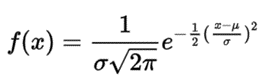

##### Empirical Rule
- Approximately 68% of all observations fall within one standard deviation of the mean.
- Approximately 95% of all observations fall within two standard deviations of the mean.
- Approximately 99.7% of all observations fall within three standard deviations of the mean.

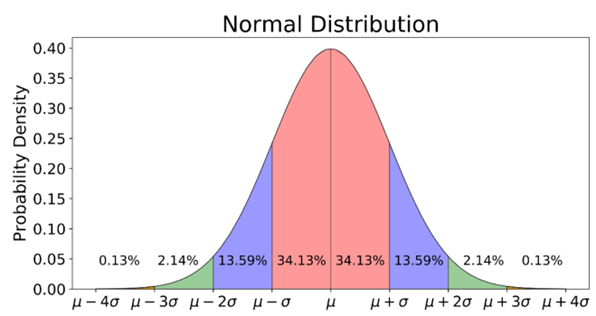

###### Example:
- Let the average sales of a particular product is 10000 and standard deviation is 2400. 

***Question:*** What is the probability of getting more than 12000 sales?

**Solution:** Given that $\mu=10000$ and $\sigma=2400$. We need to compute $P(X>=12000)$


In [ ]:
from scipy.stats import norm
print('Prob that the sales is more than 12000 is:', round(1 - norm.cdf(12000,10000,2400),2))

***Inference:***
- When we know that average sales is 10000 with a standard deviation of 2400, then the chances of having more than 12000 sales is around 20.23%

***Question:*** What is the probability of getting fewer than 9200 sales?

In [ ]:
# P(X<=9200)
print('Prob that the sales is at the most 9200 is:', round(norm.cdf(9200,10000,2400),2))

***Question:*** What is the probability of getting between 9000 to 12000 sales? 

In [ ]:
#P(x<=12000)-P(x<=9000)
print('Prob that the sales is between 9200 and 12000 is:',round(norm.cdf(12000,10000,2400) - norm.cdf(9000,10000,2400),2))

##### Risk measurement using Normal distribution
- Consider a stock with returns mean=10,std=5. What are the chances that the returns will be < 0?

In [ ]:
round(norm.cdf(0,10,5),4)

***Inference:***
- Given that, as per the past performance, the returns on the stock is 10% with the standard of deviation of 5% What is the chance of you loosing the money (returns is less than 0%).
- The chance of you loosing your money is 0.023. That is, it is around 2.3%

**Question:** What are the chances of losing money when std=10%?

In [ ]:
round(norm.cdf(0,10,10),4)

***As standard deviation of the distribution increases the risk of losing money increases.***

##### Example:
A monthly balance in the bank account of credit card holders is assumed to be normally distributed with mean 500USD and variance 100USD. 
- What is the probability that the balance can be more than  513.5USD?
- If there are 1000 customers, 
    - how many customers will have account balance more than 513.5 USD?
    - How many people will have less than 520 USD as their account balance?



In [ ]:
#Let as define variables to store the parameters
mu= 500
var= 100
sd= 10  #as variance is 100, std will be 10

In [ ]:
## p(x>=513.5) =?
print('Prob that the balance is more than 513.5 USD is :',round(1 - norm.cdf(513.5,mu,sd),4))     # 8.85% chance

In [ ]:
N= 1000
print('Out of 1000 randomly choosen customers, the number of customers with more than 513.5 USD balance is :', \
      round(N* (1-norm.cdf(513.5,mu,sd)),0))

In [ ]:
print('Out of 1000 randomly choosen customers, the number of customers with less than 520USD balance is :', \
    round(N*norm.cdf(520,mu,sd),0))

#### We will now visualize how the shape of poisson distribution would be.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters of the normal distribution
mean = 0.0
std_dev = 1.0

# Generate a range of x values
x_values = np.linspace(-5, 5, 400)

# Calculate PDF and CDF values for each x value
pdf_values = norm.pdf(x_values, mean, std_dev)
cdf_values = norm.cdf(x_values, mean, std_dev)

# Plot PDF
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, color='blue')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF')

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, color='orange')
plt.title('Normal Distribution CDF')
plt.xlabel('x')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()


### Part 3.2.5  : What is the probability that revenue falls in a given range?
Let us use the POS data to apply the normal distribution on a real data set

In [31]:
# Import the required packages
import pandas as pd

In [32]:
#read the data file
pos_data = pd.read_csv('POS_CleanData.csv')
pos_data.head()

,SKU ID,Date,Manufacturer,Sector,Category,Segment,Brand,Revenue($),Units_sold,Page_traffic
0,SKU1029,05-01-21,Synergix solutions,Oral Care,Toothpaste,Whitening Toothpaste,Close-up,0,0,0
1,SKU1054,05-08-21,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
2,SKU1068,01-08-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0
3,SKU1056,11-05-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Tom's of Maine,0,0,0
4,SKU1061,12-10-22,Synergix solutions,Oral Care,Toothpaste,Fluoride-Free Toothpaste,Himalaya Herbals,0,0,0


####  What is probability that Revenue lies between  13500 to 19700 ?

In [33]:
# first calculate the mean and SD of revenue
mean_rev = round(pos_data['Revenue($)'].mean(),2)
std_rev = round(pos_data['Revenue($)'].std(),2)

print('Average revenue is:', mean_rev)
print('Standard deviation of revenue is:', std_rev)

Average revenue is: 14377.15
Standard deviation of revenue is: 13424.8


In [34]:
# Pr(13500 <= X <= 19700) = Pr(X <= 19700) - Pr(X <= 13500)
print('Probability that revenue lies between 13500 & 19700 will be given as :',\
      round(norm.cdf(19700,mean_rev,std_rev)-norm.cdf(13500,mean_rev,std_rev),2))

Probability that revenue lies between 13500 & 19700 will be given as : 0.18


####  What is probability that Revenue is greater than 43000 ?

In [35]:
# Pr(X > 43000) = 1 - Pr(X < 43000)
print('Probability that revenue is greater than 43000 will be :', \
      round(1- norm.cdf(43000,mean_rev,std_rev),4))

Probability that revenue is greater than 43000 will be : 0.0165


####  What is probability that Revenue is less than 12000 ?

In [36]:
# Pr(X < 12000)
print('Probability that revenue is less than 12000 will be :', \
      round(norm.cdf(12000,mean_rev,std_rev),4))

Probability that revenue is less than 12000 will be : 0.4297
